In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Load Data
(train_data, _train_label), (test_data, _test_label) = cifar100.load_data()

#Parse the number
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

#normalize data
train_data = train_data / 255
test_data = test_data / 255

train_label = to_categorical(_train_label)
test_label = to_categorical(_test_label)

#model
model = Sequential()

input_shape = (32,32,3)
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())

model.add(Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())

model.add(Conv2D(256,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())

model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())

model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation = 'relu'))
model.add(Dense(100, activation = 'softmax'))

Epoch 1/20
6250/6250 [==============================] - 136s 22ms/step - loss: 4.2571 - accuracy: 0.0553
Epoch 2/20
6250/6250 [==============================] - 136s 22ms/step - loss: 3.6201 - accuracy: 0.1406
Epoch 3/20
6250/6250 [==============================] - 136s 22ms/step - loss: 3.2131 - accuracy: 0.2071
Epoch 4/20
6250/6250 [==============================] - 135s 22ms/step - loss: 2.8452 - accuracy: 0.2735
Epoch 5/20
6250/6250 [==============================] - 135s 22ms/step - loss: 2.5566 - accuracy: 0.3343
Epoch 6/20
6250/6250 [==============================] - 135s 22ms/step - loss: 2.3062 - accuracy: 0.3857
Epoch 7/20
6250/6250 [==============================] - 135s 22ms/step - loss: 2.0899 - accuracy: 0.4311
Epoch 8/20
6250/6250 [==============================] - 135s 22ms/step - loss: 1.8800 - accuracy: 0.4810
Epoch 9/20
6250/6250 [==============================] - 135s 22ms/step - loss: 1.6807 - accuracy: 0.5251
Epoch 10/20
6250/6250 [==============================] 

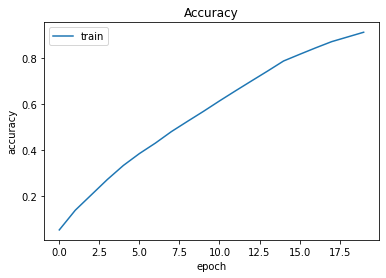

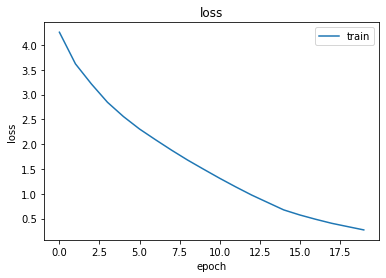

In [7]:
opt = keras.optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(verbose = 1, monitor = 'loss')
result = model.fit(train_data, train_label, epochs = 20, batch_size = 8, callbacks = [es])
print(model.summary())
predict = model.predict(test_data)
predict = np.argmax(predict, axis = 1)
test_label = np.argmax(test_label, axis = 1)
print(classification_report(y_true = test_label, y_pred = predict))
plt.plot(result.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

plt.plot(result.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()